#### Import Required Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Load and preprocess the data

In [8]:
import pandas as pd
# Reading the values from csv file
df = pd.read_csv("train.csv", parse_dates=['Date'], index_col='Date')
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df = df.fillna(method='ffill')  # Forward fill for simplicity

                  AMZN        DPZ         BTC       NFLX
Date                                                    
2013-05-01  248.229996  51.190983  106.250000  30.415714
2013-05-02  252.550003  51.987320   98.099998  30.641428
2013-05-03  258.049988  52.446388  112.900002  30.492857
2013-05-06  255.720001  53.205257  109.599998  30.098572
2013-05-07  257.730011  54.151505  113.199997  29.464285
AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64


#### EDA(Exploratory Data Analysis)

In [9]:
#summarise the data
print(df.describe())

              AMZN          DPZ           BTC         NFLX
count  1520.000000  1520.000000   1520.000000  1520.000000
mean    821.541810   146.771695   2421.465669   147.668273
std     518.442653    72.192287   3310.894199   107.641486
min     248.229996    51.190983     69.660004    29.464285
25%     364.360001    84.993593    340.904999    62.851071
50%     686.459992   127.168053    625.304993   104.000000
75%    1121.287536   202.454994   3874.912415   192.207496
max    2039.510010   298.635986  18972.320310   418.970001


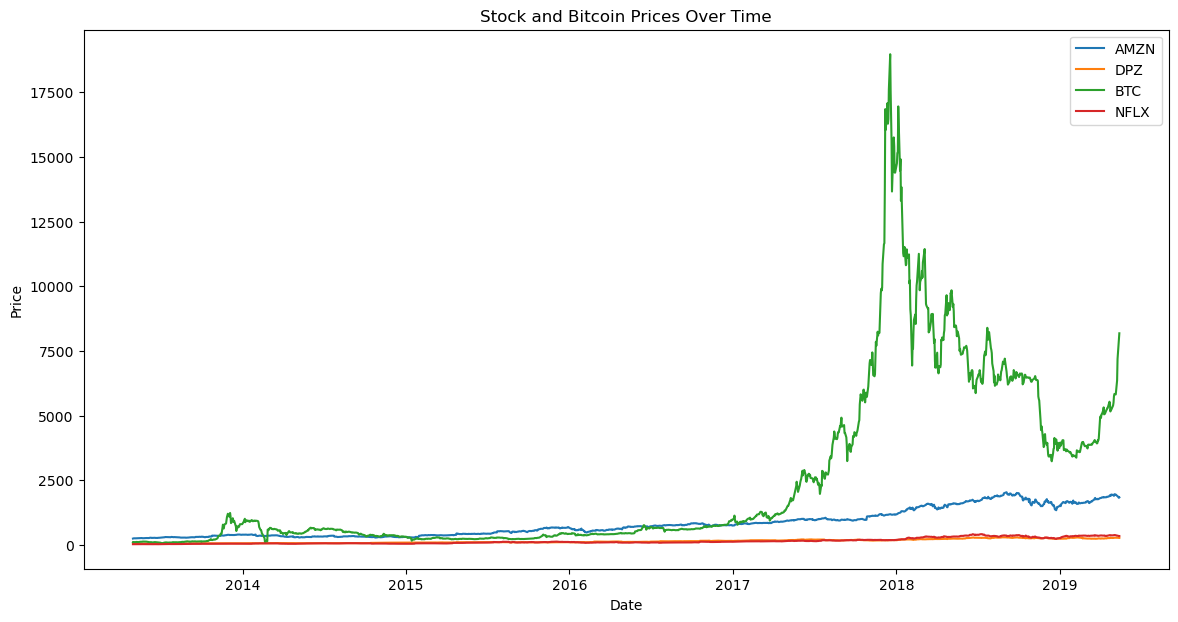

In [10]:
#Plot the data
plt.figure(figsize=(14, 7))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.title('Stock and Bitcoin Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

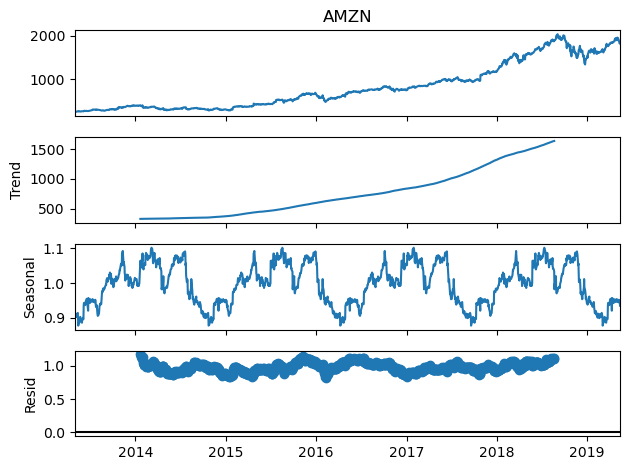

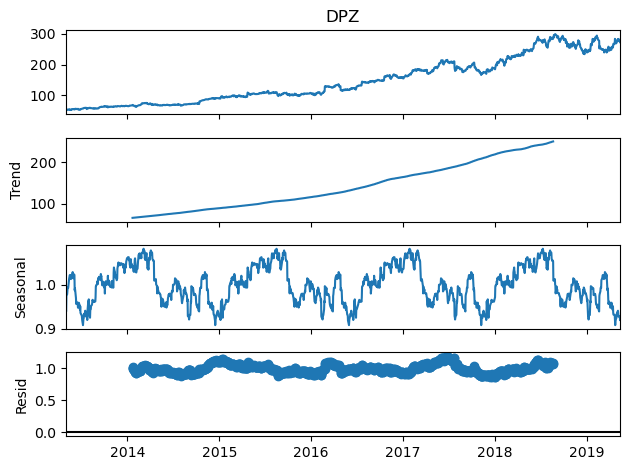

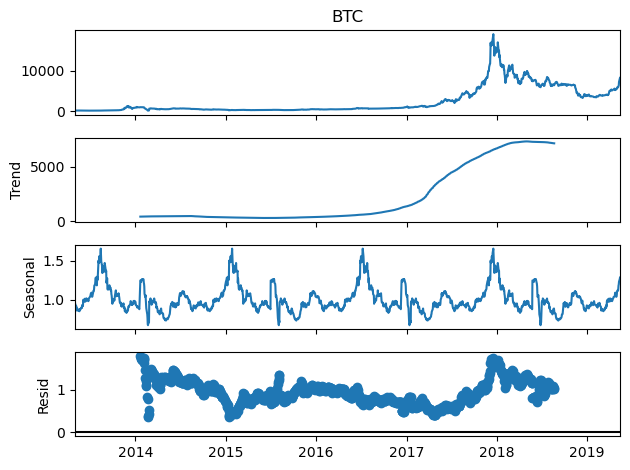

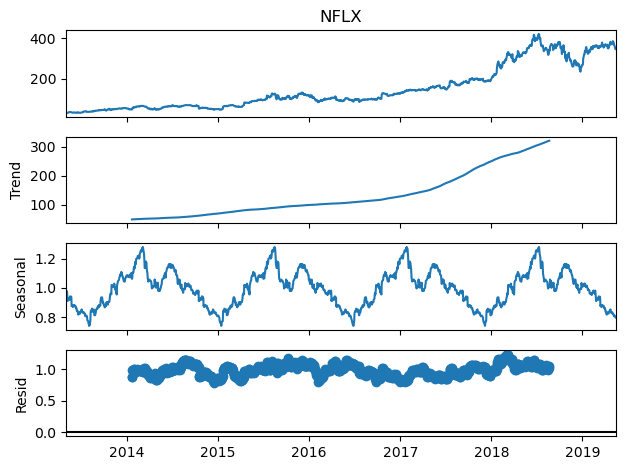

In [13]:
#seasonal decomposition
for column in df.columns:
    decomposition = seasonal_decompose(df[column], model='multiplicative', period=365)
    decomposition.plot()
    plt.show()

In [14]:
#ADF Test and Differencing
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}, {value}')

for column in df.columns:
    print(f'ADF Test for {column}')
    adf_test(df[column])
df_diff = df.diff().dropna()

ADF Test for AMZN
ADF Statistic: 0.553659912330018
p-value: 0.986415949572589
Critical Values:
   1%, -3.434731647915545
   5%, -2.8634752174058944
   10%, -2.5678002869095424
ADF Test for DPZ
ADF Statistic: -0.27933496068924263
p-value: 0.9283805552655591
Critical Values:
   1%, -3.4346765666049732
   5%, -2.8634509075517536
   10%, -2.5677873417107437
ADF Test for BTC
ADF Statistic: -1.3230811198913224
p-value: 0.6185476417504845
Critical Values:
   1%, -3.4347228578139943
   5%, -2.863471337969528
   10%, -2.5677982210726897
ADF Test for NFLX
ADF Statistic: -0.18415819336089054
p-value: 0.9403837629187612
Critical Values:
   1%, -3.434725783926551
   5%, -2.863472629385615
   10%, -2.567798908763865


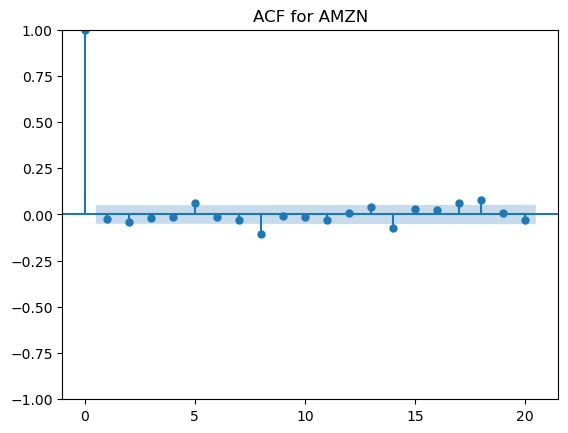

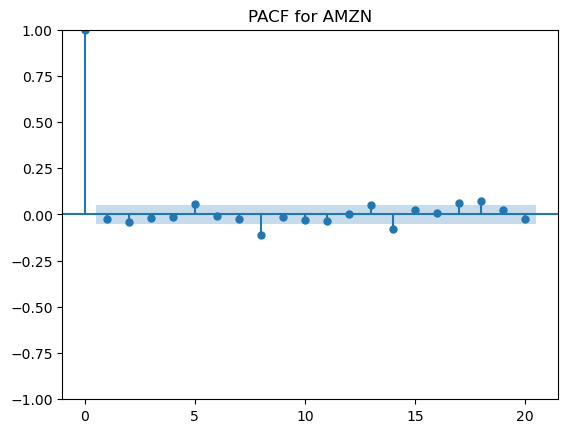

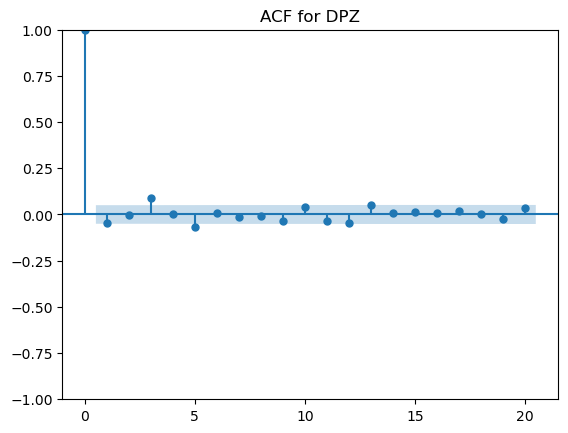

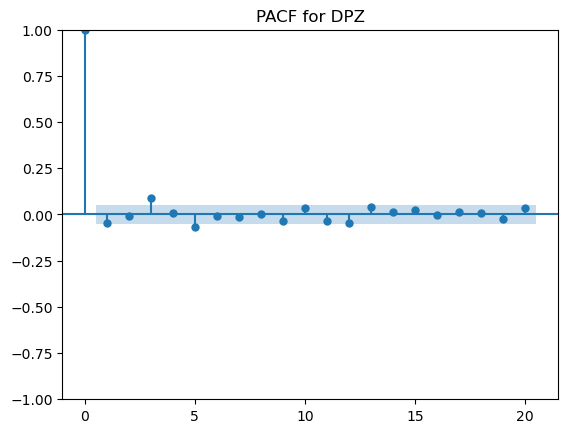

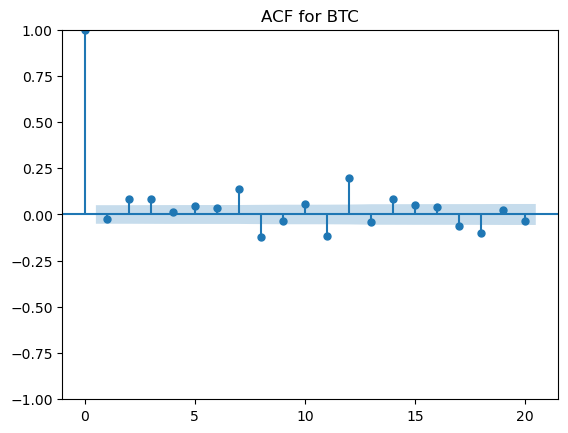

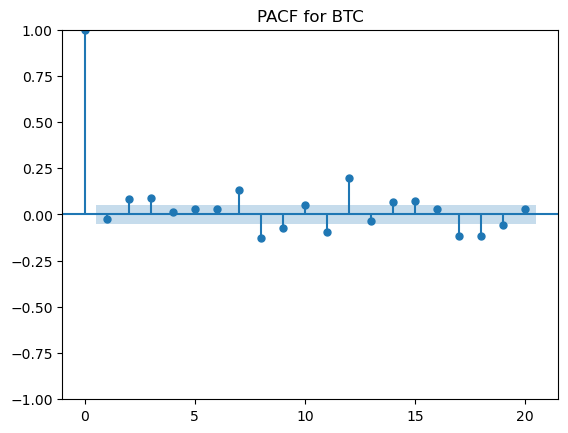

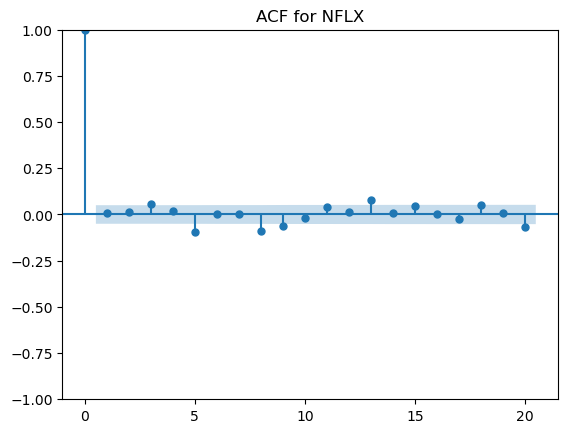

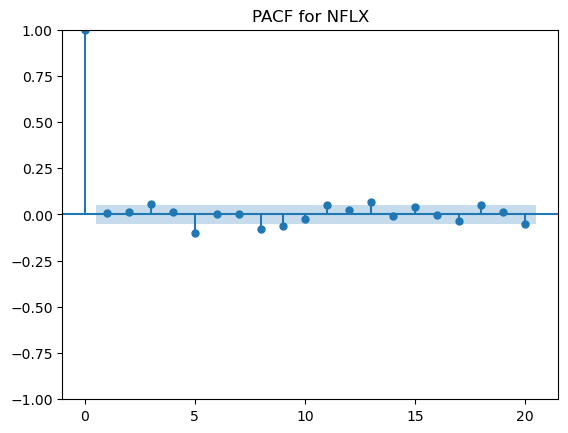

In [15]:
#ACF and PACF plots
for column in df_diff.columns:
    plot_acf(df_diff[column], lags=20)
    plt.title(f'ACF for {column}')
    plt.show()
    
    plot_pacf(df_diff[column], lags=20)
    plt.title(f'PACF for {column}')
    plt.show()

#### Model building and forecasting

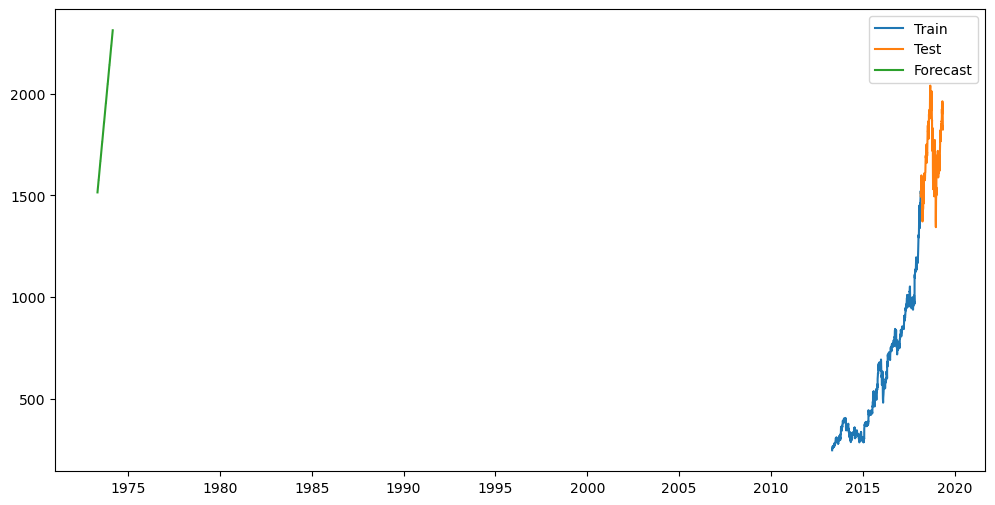

Mean Squared Error: 95701.41626483407
Mean Absolute Error: 237.69517395975612


In [16]:
#split the data
train, test = train_test_split(df, test_size=0.2, shuffle=False)

#Holt-Winters Exponential Smoothing
model = ExponentialSmoothing(train['AMZN'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

pred = model_fit.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['AMZN'], label='Train')
plt.plot(test.index, test['AMZN'], label='Test')
plt.plot(pred.index, pred, label='Forecast')
plt.legend()
plt.show()

mse = mean_squared_error(test['AMZN'], pred)
mae = mean_absolute_error(test['AMZN'], pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
